In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date

In [2]:
today = date.today()
print("Today's date:", today)
date_today = str(today)
date_today

Today's date: 2022-06-02


'2022-06-02'

In [3]:
tubulin = '[Tubulin] ' r'$(\mu M)$'
tub = 'tub'

DCXconc = '[DCX] ' r'$(n M)$'
DCX = 'DCX'
Type = 'DCX Type'

taxol = '[Taxol] ' r'$(\mu M)$'

Concentration = 'Concentration ' r'$(\mu M)$'
Length = 'Length ' r'$(\mu m)$'
Lifetime = 'Lifetime ' r'$(min)$'
GrowthRate = 'Growth Rate ' r'$(\mu m / min)$'
TimeToNucleate = 'Time to Nucleate ' r'$(min)$'
ShrinkageLength = 'Shrink Length ' r'$(\mu m)$'
ShrinkageLifetime = 'Shrink Lifetime ' r'$(min)$'
ShrinkageRate = 'Shrink Rate ' r'$(\mu m / min)$'

In [44]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
darkyellow= '#FCF2B8'
yellow = '#FFCB05'
lightyellow = '#FCF2B8'
pink = '#FFA4CD'
StartHue1 = Color(purple)
DC1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
DC2color = list(StartHue2.range_to(Color(lightorange),3))


palette = [grey,cyan] + list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green]
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]

StartHue3 = Color(lightyellow)
Yellowcolor = list(StartHue3.range_to(Color(darkyellow),5))
Yellowpalette = list(map(Color.get_hex,Yellowcolor))
Yellowpalette

['#fcf2b8', '#fcf2b8', '#fcf2b8', '#fcf2b8', '#fcf2b8']

## Import Kappa csv ##

In [202]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [203]:
files = [x for x in path.iterdir() if x.is_file()]
files = [i for i in files if (str(i)[-7:] == 'yes.csv') == True]
files

[WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter/2022-05-25_doublecapped/CH3_0.3uMtax/1-Stream_Composite_stack-1vs223-after-yes.csv'),
 WindowsPath('C:/Users/sofia/OneDrive/Documentos/2022_1winter/2022-05-25_doublecapped/CH3_0.3uMtax/1-Stream_Composite_stack-1vs223-before-yes.csv')]

In [204]:
i = files[0]
dateloc = str(i).rfind("202")   
dates = str(i)[dateloc : dateloc+10]

CHlocstart = str(i).find("CH") 
CHlocend = str(i).find('_', CHlocstart)
CH = str(i)[CHlocstart: CHlocend]

taxlocend = str(i).find('tax', CHlocend)
tax = str(i)[CHlocend+1: taxlocend-2]

dates,CH,tax

('2022-05-25', 'CH3', '0.3')

In [206]:
keep_columns = ['Curve Name','Curve Length (um)']

data_notax_avg = data_notax.drop_duplicates(subset ='Curve Length (um)', keep = 'first')
data_notax_avg = data_notax_avg[keep_columns]
data_notax_avg[taxol]=0

data_Wtax_avg = data_Wtax.drop_duplicates(subset ='Curve Length (um)', keep = 'first')
data_Wtax_avg = data_Wtax_avg[keep_columns]
data_Wtax_avg[taxol]=float(tax)

data = pd.concat([data_notax_avg, data_Wtax_avg], ignore_index=True)
data['Date']=dates
data['CH']=CH


data = data.sort_values(['Curve Name',taxol])

In [207]:
data

,Curve Name,Curve Length (um),[Taxol] $(\mu M)$,Date,CH
0,CURVE 1,15.540096,0.0,2022-05-25,CH3
5,CURVE 1,15.681216,0.3,2022-05-25,CH3
1,CURVE 2,16.678328,0.0,2022-05-25,CH3
6,CURVE 2,16.860723,0.3,2022-05-25,CH3
2,CURVE 3,9.195676,0.0,2022-05-25,CH3
7,CURVE 3,9.270717,0.3,2022-05-25,CH3
3,CURVE 4,14.524334,0.0,2022-05-25,CH3
8,CURVE 4,14.574274,0.3,2022-05-25,CH3
4,CURVE 5,15.932753,0.0,2022-05-25,CH3
9,CURVE 5,16.003292,0.3,2022-05-25,CH3


In [208]:
newdirectory = str(path.parents[1])+'//Expansion_Data_Sheets'
newmydir = Path(newdirectory)
newmydir.mkdir(exist_ok=True)

In [209]:
data.to_csv(path/(dates+'_'+CH+'_expansion0_analysed-on_'+date_today +'.csv'), encoding='utf-8', index=False)
data.to_csv(newmydir/(dates+'_'+CH+'_expansion0_analysed-on_'+date_today+'.csv'), encoding='utf-8', index=False)

### Ratio ###

In [5]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [6]:
files = [x for x in path.iterdir() if x.is_file()]
files = [i for i in files if (str(i)[-9:] != 'Sheet.csv') == True]
files = [i for i in files if (str(i)[-3:] == 'csv') == True]
files

[WindowsPath('C:/Users/Brouhard Lab/OneDrive/Documentos/2022_1winter/Expansion_Data_Sheets/2022-05-03_CH2_expansion_analysed-on_2022-05-18.csv'),
 WindowsPath('C:/Users/Brouhard Lab/OneDrive/Documentos/2022_1winter/Expansion_Data_Sheets/2022-05-13_CH1_expansion_analysed-on_2022-05-17.csv'),
 WindowsPath('C:/Users/Brouhard Lab/OneDrive/Documentos/2022_1winter/Expansion_Data_Sheets/2022-05-13_CH2_expansion_analysed-on_2022-05-17.csv'),
 WindowsPath('C:/Users/Brouhard Lab/OneDrive/Documentos/2022_1winter/Expansion_Data_Sheets/2022-05-13_CH3_expansion_analysed-on_2022-05-17.csv'),
 WindowsPath('C:/Users/Brouhard Lab/OneDrive/Documentos/2022_1winter/Expansion_Data_Sheets/2022-05-13_CH4_expansion_analysed-on_2022-05-17.csv'),
 WindowsPath('C:/Users/Brouhard Lab/OneDrive/Documentos/2022_1winter/Expansion_Data_Sheets/2022-05-25_CH1_expansion1_analysed-on_2022-05-29.csv'),
 WindowsPath('C:/Users/Brouhard Lab/OneDrive/Documentos/2022_1winter/Expansion_Data_Sheets/2022-05-25_CH1_expansion2_analys

In [7]:
joindata = pd.read_csv(files[0], encoding='utf-8')
for i in range(1,len(files)):
    d = pd.read_csv(files[i], encoding='utf-8')
    joindata = joindata.append(d, ignore_index=True)

joindata.to_csv(path/('jointdata-on_'+date_today +'_MasterSheet.csv'), encoding='utf-8', index=False)
joindata

,Curve Name,Curve Length (um),[Taxol] $(\mu M)$,Date,CH
0,CURVE 1,20.464017,0.0,2022-05-03,CH2
1,CURVE 1,20.995385,10.0,2022-05-03,CH2
2,CURVE 10,19.873343,0.0,2022-05-03,CH2
3,CURVE 10,20.522329,10.0,2022-05-03,CH2
4,CURVE 2,14.120813,0.0,2022-05-03,CH2
...,...,...,...,...,...
125,CURVE 2,23.829905,0.3,2022-05-25,CH4
126,CURVE 1,14.716855,0.0,2022-05-25,CH5
127,CURVE 1,15.023748,1.0,2022-05-25,CH5
128,CURVE 2,22.356874,0.0,2022-05-25,CH5


### If data already joint ###

In [8]:
NoTaxolData = joindata.iloc[:-2:2]
TaxolData = joindata.iloc[1:-1:2]
ratio = NoTaxolData['Curve Length (um)'].values / TaxolData['Curve Length (um)'].values
percent_expansion = (1- ratio)*100
TaxolData['Expansion %'] = percent_expansion

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [9]:
TaxolData.to_csv(path/('expansiondata-on_'+date_today +'_MasterSheet.csv'), encoding='utf-8', index=False)


In [18]:
nogales2018 = (1- 81.76/83.95)*100
nogales2018

2.608695652173909

In [19]:
nogales2017 = (1- 81.5/83.2)*100
nogales2017


2.043269230769229

In [20]:
TAXnogales2017preformed = (1- 81.5/81.8)*100
TAXnogales2017copoly = (1- 81.5/82.3)*100
TAXnogales2017preformed , TAXnogales2017copoly


(0.3667481662591676, 0.9720534629404587)

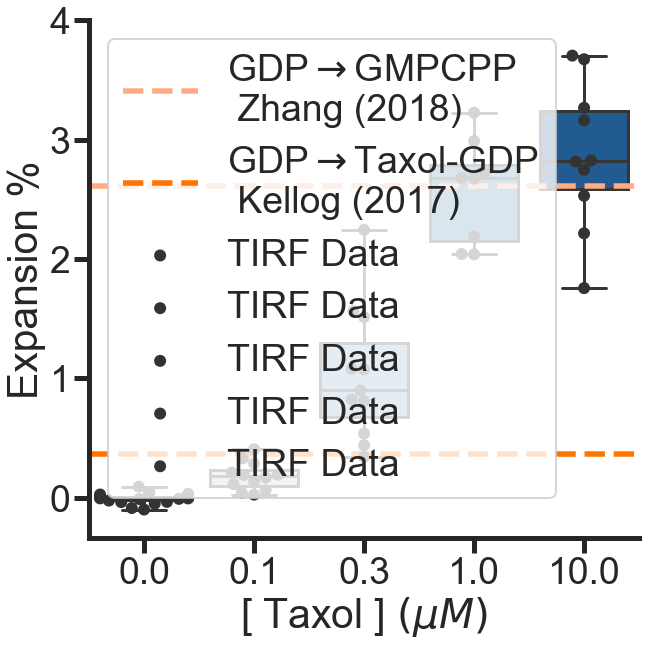

In [50]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

#rect = 0,0,1,1 # create an rectangle for the new axis
#log_ax = fig.add_axes(rect) # create a new axis (or use an existing one)
#log_ax.set_xscale("log") # log first

ax = sns.boxplot(x=taxol, y='Expansion %', data=TaxolData, whis=np.inf, palette='Blues',linewidth=3)
ax = sns.swarmplot(x=taxol, y='Expansion %', data=TaxolData, color=".2", size=12, label='TIRF Data')
ax.axhline(y = nogales2018, color = lightorange ,linestyle="--", linewidth=5.5, label='GDP'r'$\rightarrow$''GMPCPP \n Zhang (2018)')
ax.axhline(y = TAXnogales2017preformed, color = orange ,linestyle="--", linewidth=5.5, label='GDP'r'$\rightarrow$''Taxol-GDP \n Kellogg (2017)')
#plt.xlim(0.1,10)

ax.set_ylim(None,4)
ax.legend( loc = 'upper left')
#ax.legend('')
ax.set_xlabel('[ Taxol ] ' r'$ ( \mu M ) $')

sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)
ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()


plt.savefig(path/('expansion_'+date_today+'.svg'))

In [38]:
(1- 81.76/83.95)*100

2.608695652173909

In [51]:
joindata

,Curve Name,Curve Length (um),[Taxol] $(\mu M)$,Date,CH
0,CURVE 1,20.464017,0.0,2022-05-03,CH2
1,CURVE 1,20.995385,10.0,2022-05-03,CH2
2,CURVE 10,19.873343,0.0,2022-05-03,CH2
3,CURVE 10,20.522329,10.0,2022-05-03,CH2
4,CURVE 2,14.120813,0.0,2022-05-03,CH2
...,...,...,...,...,...
125,CURVE 2,23.829905,0.3,2022-05-25,CH4
126,CURVE 1,14.716855,0.0,2022-05-25,CH5
127,CURVE 1,15.023748,1.0,2022-05-25,CH5
128,CURVE 2,22.356874,0.0,2022-05-25,CH5


In [52]:
joindata.groupby(taxol).size()

[Taxol] $(\mu M)$
0.0     88
0.1     12
0.3     11
1.0      9
10.0    10
dtype: int64

In [54]:
(88-12-11-9-10)/2

23.0